# Analysis of the CaK. line
flare 6/9/2017

Remark that there are two flares here 

# start with flare of 11:55:47 

In [36]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import use_nessi as un
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


# functies uittesten met CaK

In [37]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s


In [38]:
reload(un)
# And now the running commands
openfile="nb_3950_2017-09-06T11_55_49_11_55_49=6-399_mixed_corrected_im.fits"
header= f.getheader(un.get_file_path_fits(openfile))
header = add_enters(str(header), length_row=79)
print(header)




SIMPLE  =                    T / Written by IDL:  Tue Mar 14 15:39:37 2023     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 1258 / Number of positions along axis 1              
 NAXIS2  =                 1713 / Number of positions along axis 2              
 NAXIS3  =                   20 / Number of positions along axis 3              
 NAXIS4  =                    1 / Number of positions along axis 4              
 NAXIS5  =                  394 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 EXTNAME = 'Main'                                                               
 DATE    = '2023-03-30T16:49:48' / Creation UTC date of FITS header             
 VAR_KEYS= 'VAR-EXT-PRSTEP1;PRSTEP1,VAR-EXT-PRPARA1;PRPARA1,VAR-EXT-PRVER1;PRVE&
'CONTINUE  'R1,VAR-EXT-PRREF1

for the spectral positions of the data: see harps paper! We calculate these here:

In [39]:
peak = 3933.663
D = np.array([-1.00, -0.85, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.07, 0, 0.07, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.85, 1.00, 0 ])
wavl = D+peak
wavl[-1] = 4000
np.save('spectfile3950_.npy', wavl)
wavl, np.shape(wavl)

(array([3932.663, 3932.813, 3933.013, 3933.113, 3933.213, 3933.313,
        3933.413, 3933.513, 3933.593, 3933.663, 3933.733, 3933.813,
        3933.913, 3934.013, 3934.113, 3934.213, 3934.313, 3934.513,
        3934.663, 4000.   ]),
 (20,))

The time series are also not yet given. Calcultate them from: 
START+'2017-09-06T11:56:28.03739' END= '2017-09-06T12:39:22.07020' in units [minutes]

In [40]:
def num_to_time_minutes(n):
    h = int(n//60)
    n = n%60
    m = int(n//1)
    s = (n%1)*60
    h = str(h) if len(str(h)) == 2 else  '0'+str(h)
    m = str(m) if len(str(m)) == 2 else  '0'+str(m)
    s = str(s) if len(str(round(np.floor(s)))) == 2 else '0'+str(s)
    return h+':'+m+':'+s

start = 11*60+56+28.03739/60
end  = 12*60+39+22.07020/60
TIME = np.linspace(start=start, stop=end, num=394)
TIMESTR = [num_to_time_minutes(t) for t in TIME] #'09:58:01.652'
TIME, TIMESTR


(array([716.46728983, 716.57645153, 716.68561323, 716.79477492,
        716.90393662, 717.01309832, 717.12226001, 717.23142171,
        717.34058341, 717.4497451 , 717.5589068 , 717.6680685 ,
        717.77723019, 717.88639189, 717.99555359, 718.10471528,
        718.21387698, 718.32303868, 718.43220038, 718.54136207,
        718.65052377, 718.75968547, 718.86884716, 718.97800886,
        719.08717056, 719.19633225, 719.30549395, 719.41465565,
        719.52381734, 719.63297904, 719.74214074, 719.85130243,
        719.96046413, 720.06962583, 720.17878752, 720.28794922,
        720.39711092, 720.50627261, 720.61543431, 720.72459601,
        720.8337577 , 720.9429194 , 721.0520811 , 721.16124279,
        721.27040449, 721.37956619, 721.48872789, 721.59788958,
        721.70705128, 721.81621298, 721.92537467, 722.03453637,
        722.14369807, 722.25285976, 722.36202146, 722.47118316,
        722.58034485, 722.68950655, 722.79866825, 722.90782994,
        723.01699164, 723.12615334, 723.

 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


Boundary
Blue=Outside, yellow=Inside


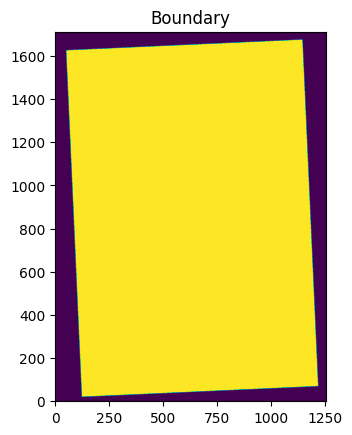

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


In [41]:
reload(un)
CaK= un.SST_data('nb_3950_2017-09-06T11_55_49_11_55_49=6-399_mixed_corrected_im.fits',
                   'spectfile3950_.npy','times8542_93_2017_09_06_11_55_47.idlsave',name_of_line='CaK17')


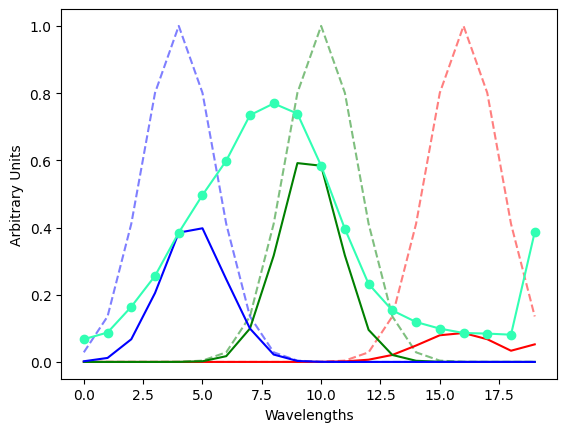

In [42]:
# %matplotlib inline
CaK.update_filters([[16,1.5], [10,1.5], [4,1.5]])
CaK.plot_filt(880,900)

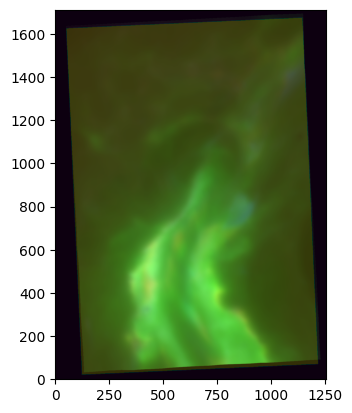

(1713, 1258, 3)


In [43]:
CaK.ccp_frame(70,Show=False)
plt.imshow(CaK.current_ccp,origin='lower')

plt.imshow(CaK.boundary,origin='lower', alpha=0.2)
plt.show()
print(np.shape(CaK.current_ccp))#@,np.shape(CaK.Boundary,origin='lower'))

In [44]:
sst_data = CaK
sst_data._time = TIMESTR

In [45]:
# # Many COCOPLOTS
# r = CaK._number_of_frames
# for i in range(0,r,40):
#     print(sst_data._time[i])
#     tstr = CaK.time_of_frame(i)
#     print("COCOPLOT at ", tstr, "(frame number", i,")")
#     CaK.ccp_frame(i,Show=False)
#     plt.imshow(CaK.current_ccp,origin='lower')

#     plt.imshow(CaK.boundary,origin='lower', alpha=0.2)
#     plt.show()


In [46]:
def check_scalar_not_nan(sst_data):
    if hasattr(sst_data, 'scalar'):
        if np.isnan(sst_data.scalar):
            print('This is a problem. The sst_data.scalar is nan.')
            # A scalar which will normalize the intensity
            sst_data.scalar = 0
            sst_data.scalar = sst_data.frame_integrated_spect(0)[0]
            if np.isnan(sst_data.scalar):
                print('The problem is not fixed by renormalization.\nMake sure no other constants are nan in the definition of the scalar')
                if hasattr(sst_data,'correction'):
                    print('the correction', sst_data.correction )

    else:
        sst_data.frame_integrated_spect(0)
        sst_data.check_scalar_not_nan

check_scalar_not_nan(sst_data)

np.shape(sst_data.datacube)

(394, 1, 20, 1713, 1258)

[3.26628902e-09 3.47955709e-09 4.14122292e-09 4.80511453e-09
 5.90842530e-09 7.87825272e-09 1.12504823e-08 1.64164788e-08
 1.94865795e-08 1.99462082e-08 1.86656717e-08 1.56483342e-08
 1.13857306e-08 8.54703330e-09 6.64290889e-09 5.59932234e-09
 4.91037389e-09 4.10402645e-09 3.76870624e-09 1.19996004e-08]


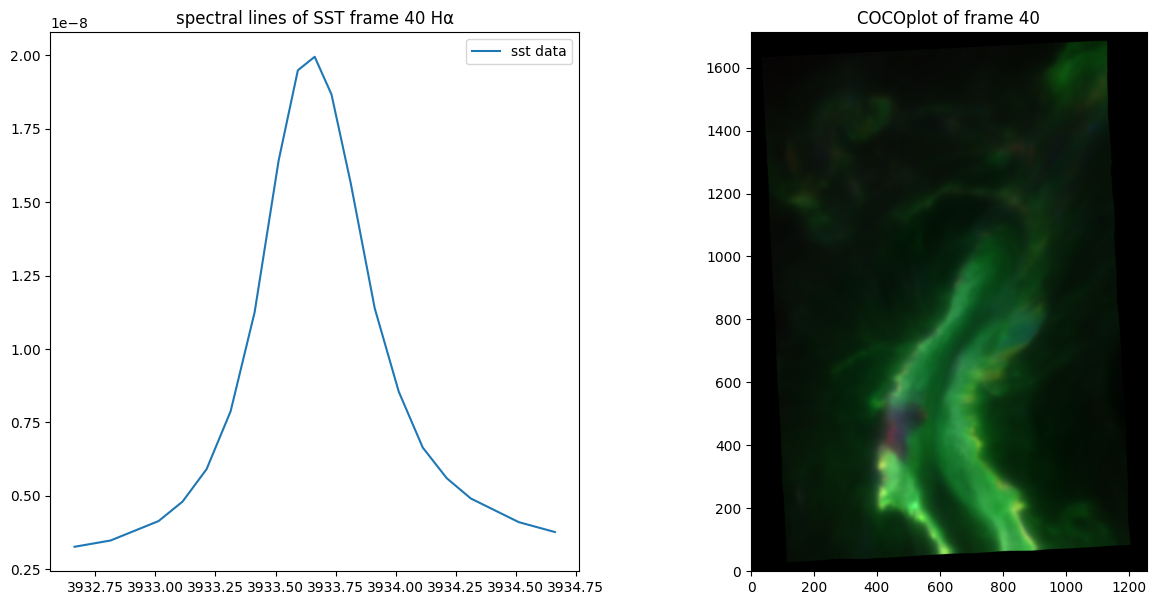

In [47]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 40
sst_data.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
sst_data.frame_integrated_spect(frame)
print(sst_data.av_spect)
ax[0].plot(sst_data._wavel[:-1], sst_data.av_spect[:-1], label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(sst_data.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

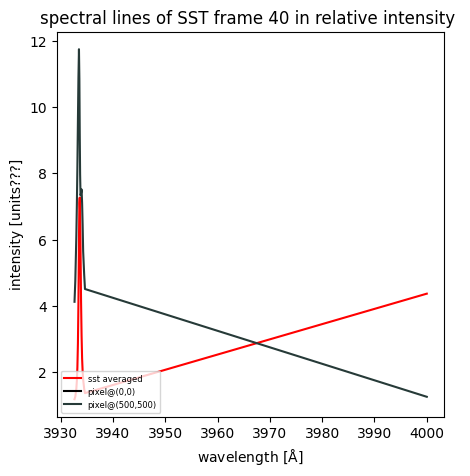

In [48]:
sst_data.current_ccp[0:30:10,0:60:20,:]
sst_data.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

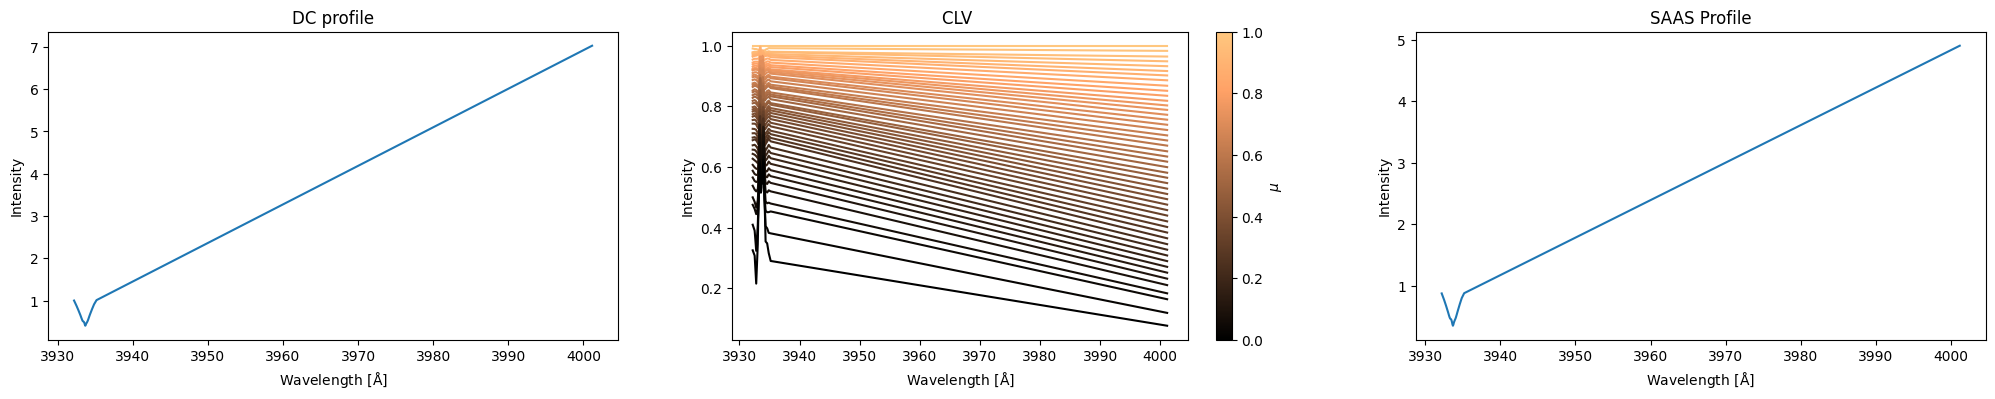

3933.7251200421415 [3932.19676006 3932.52204006 3932.78196005 3933.04188005 3933.10724005
 3933.17260005 3933.23796005 3933.30180005 3933.36716005 3933.43252005
 3933.49788004 3933.56172004 3933.62708004 3933.69244004 3933.75780004
 3933.82316004 3933.88700004 3933.95236004 3934.01772004 3934.08308004
 3934.14692004 3934.21228004 3934.27764004 3934.34300003 3934.60292003
 3934.86284003 3935.18812002 4001.14743998] [[1.         0.87620153 0.76842093 ... 0.91159718 1.00986771 7.02642874]
 [0.99070422 0.86673757 0.75995494 ... 0.90441404 1.00158354 6.90696614]
 [0.97648119 0.85636997 0.74948236 ... 0.89316074 0.98976455 6.77536039]
 ...
 [0.47531055 0.4044703  0.34149005 ... 0.41114552 0.45777378 1.1500991 ]
 [0.40946949 0.34169658 0.24846519 ... 0.34877113 0.38476981 0.83355861]
 [0.32502657 0.2695266  0.16539272 ... 0.28802065 0.29277341 0.53603683]]


In [49]:
reload(un)
theor_line = un.linestudier('final_3934.npy', atlas=None, nr=101, neglect_atlas=True)
theor_line.saas_profile_atlas_check(show_all=True)
# theor_line.define_point_at_continuum(-1)
print(np.median(theor_line.sst_wav), (theor_line.sst_wav), theor_line.sst_int)


In [50]:

def plot_separate_last_point(X, Y):
    # If we were to simply plot pts, we'd lose most of the interesting
    # details due to the outliers. So let's 'break' or 'cut-out' the y-axis
    # into two portions - use the top (ax1) for the outliers, and the bottom
    # (ax2) for the details of the majority of our data
    # fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios': [10, 1]}, sharey=True)
    fig.subplots_adjust(wspace=0.02)  # adjust space between axes
    # fig.subplots_adjust(hspace=0.05)  # adjust space between axes

    # plot the same data on both axes
    ax1.plot(X, Y, '-o')
    ax2.plot(X, Y, 'o')

    # zoom-in / limit the view to different portions of the data
    delta = (- X[0] + X[-2] )/30
    ax1.set_xlim(X[0]-delta, X[-2]+delta)  # outliers only
    ax2.set_xlim(X[-1]-delta, X[-1]+delta)  # most of the data

    # hide the spines between ax and ax2
    ax1.spines.right.set_visible(False)
    ax2.spines.left.set_visible(False)
    ax1.yaxis.tick_left()
    ax1.tick_params(labeltop=False)  # don't put tick labels at the top
    ax2.yaxis.tick_right()

    # Now, let's turn towards the cut-out slanted lines.
    # We create line objects in axes coordinates, in which (0,0), (0,1),
    # (1,0), and (1,1) are the four corners of the axes.
    # The slanted lines themselves are markers at those locations, such that the
    # lines keep their angle and position, independent of the axes size or scale
    # Finally, we need to disable clipping.

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-d, -1), (d, 1)], markersize=12,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([1, 1], [1, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 0], [1, 0], transform=ax2.transAxes, **kwargs)

        
    # Set only one specific number as x-tick on ax2
    ax2.set_xticks([X[-1]])
    ax2.set_xticklabels([f'{X[-1]:.0f}'])  # Format the label as needed

    plt.show()


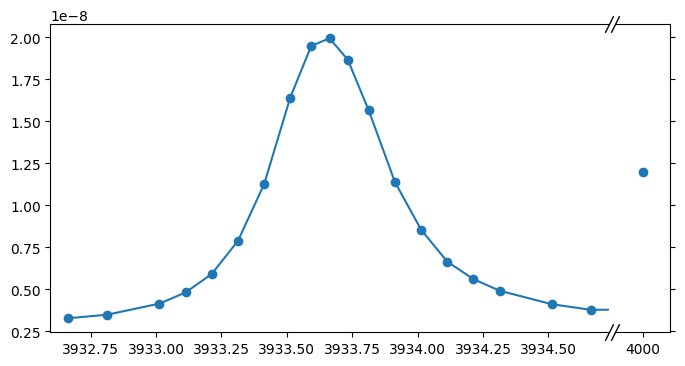

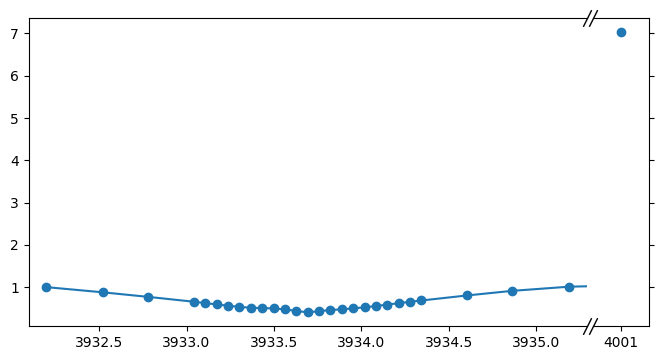

(array([3932.663, 3932.813, 3933.013, 3933.113, 3933.213, 3933.313,
        3933.413, 3933.513, 3933.593, 3933.663, 3933.733, 3933.813,
        3933.913, 3934.013, 3934.113, 3934.213, 3934.313, 3934.513,
        3934.663, 4000.   ]),
 array([3.26628902e-09, 3.47955709e-09, 4.14122292e-09, 4.80511453e-09,
        5.90842530e-09, 7.87825272e-09, 1.12504823e-08, 1.64164788e-08,
        1.94865795e-08, 1.99462082e-08, 1.86656717e-08, 1.56483342e-08,
        1.13857306e-08, 8.54703330e-09, 6.64290889e-09, 5.59932234e-09,
        4.91037389e-09, 4.10402645e-09, 3.76870624e-09, 1.19996004e-08]))

In [51]:
sst_data = CaK

plot_separate_last_point(sst_data._wavel, sst_data.av_spect)
plot_separate_last_point(theor_line.sst_wav, theor_line.sst_int[0])
sst_data._wavel, sst_data.av_spect


## Calculating the mu !!!!! 

(394, 1, 20, 1713, 1258)
The frame is centered at (524.6951755526969, -235.1869288002494)


 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


[500.87502555269697, 548.5153255526969, -267.62932880024937, -202.7445288002494]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.799966045035531 for timeframe 0
The frame is centered at (529.4665422492486, -232.5215139851784)
[505.64639224924866, 553.2866922492486, -264.96391398517835, -200.0791139851784]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.7973933717428934 for timeframe 200
We take average mu to be  0.7986797083892122
Mu also set to the theoretic nessi line.


(0.7986797083892122, array([10], dtype=int64))

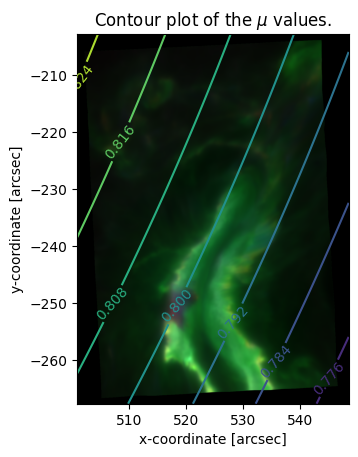

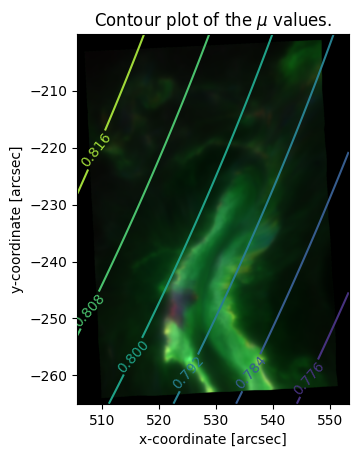

In [52]:
# def set_mu(sst_data, theor_line, number_of_last_frame=None):
#     if number_of_last_frame is None:
#         number_of_last_frame = sst_data._number_of_frames - 1
#     mu1 = un.give_mu_contourplot('nb_6563_2017-09-06T09_04_20_09_04_20=0-200_mixed_corrected_im.fits', over=sst_data)
#     mu2 = un.give_mu_contourplot('nb_6563_2017-09-06T09_04_20_09_04_20=0-200_mixed_corrected_im.fits', over=sst_data,
#                                 timeFrame=number_of_last_frame)
#     sst_data.mu = (mu1 + mu2) / 2
#     print('We take average mu to be ', sst_data.mu)
#     fix_mu_theor(theor_line, mu)
#     return sst_data.mu

# def fix_mu_theor(theor_line, mu):
#     theor_line.exact_mu = mu
#     x = np.abs(theor_line.sst_mu-mu)
#     index_mu = np.where(x == np.min(x))[0]
#     theor_line.index_mu = index_mu
#     theor_line.best_fit_clv = clv_fit(mu, theor_line)
#     print(f'Mu also set to the theoretic nessi line.')


# def clv_fit(mu, theor_line):
#     return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)

# fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[index_mu], theor_line.sst_clv[index_mu][0], clv_fit(mu, theor_line)

print(np.shape(sst_data.datacube))
mu = sst_data.set_mu(theor_line, number_of_last_frame=200)
x = np.abs(theor_line.sst_mu-mu)
index_mu = np.where(x == np.min(x))[0]
mu, index_mu

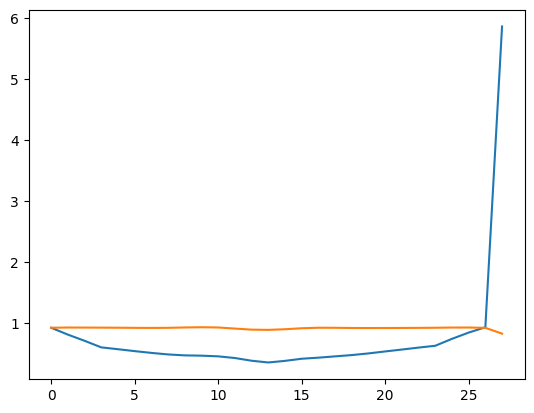

In [53]:
plt.plot(theor_line.best_fit_clv * theor_line.sst_dc)
plt.plot(theor_line.best_fit_clv)


## Finding a suitable quiet sun patch
# In this case there doesn't realy exists a goed so we use the point at the continuum

In [54]:
scaler = sst_data.av_spect[0]
frame, np.shape(sst_data.datacube)

(40, (394, 1, 20, 1713, 1258))

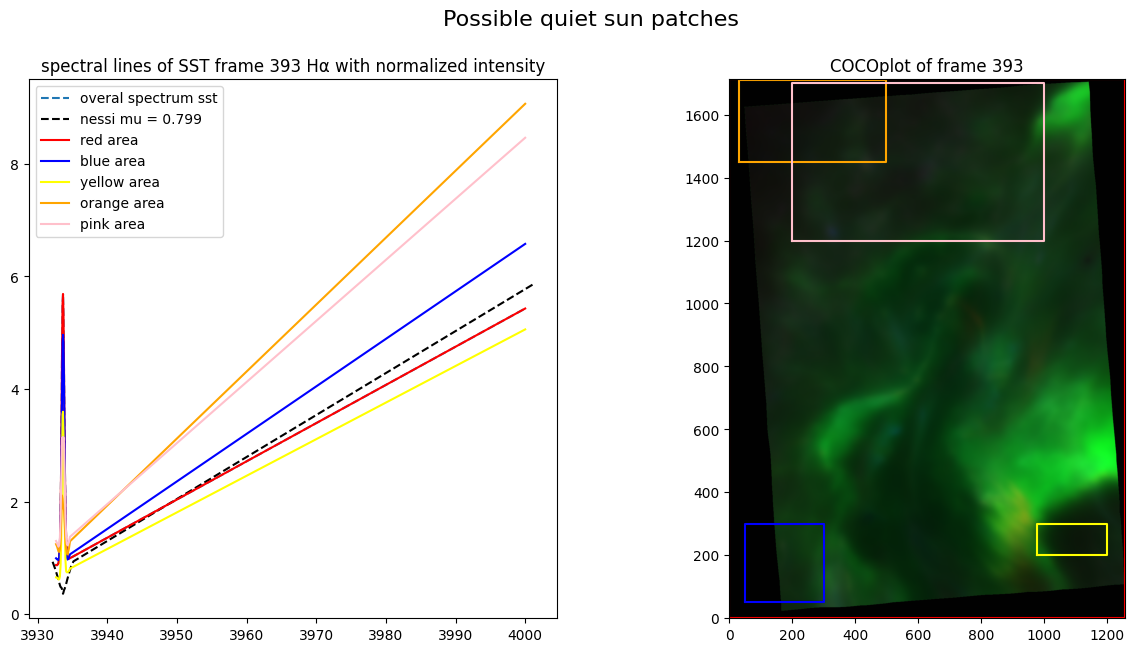

In [55]:
frame=393

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

sst_data.ccp_frame(frame,Show=False)
# xlim, ylim
X = [ [(0, 1257 ), (0,1712)],[(50,300), (50,300)], [(980, 1200), (200, 300)] , [(30,500), (1450, 1710)], [(200, 1000), (1200,1700)]]# max x: 1258, y: 1713
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
sst_data.frame_integrated_spect(frame)
ax[0].plot(sst_data._wavel, sst_data.av_spect/scaler, '--', label='overal spectrum sst')
# ax[0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1], label='saas nessi')

theta = [np.median(sst_data._wavel)-np.median(theor_line.sst_wav),0,1]

ax[0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1],
            '--', label=f'nessi mu = {round(sst_data.mu, 3)}', color='black')

ax[1].imshow(sst_data.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(sst_data._wavel, sst_data.frame_integrated_spect(frame, xlim=xlim, ylim=ylim)/scaler, color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()
# ax[0].set_xlim(sst_data.line_lim)

plt.show()


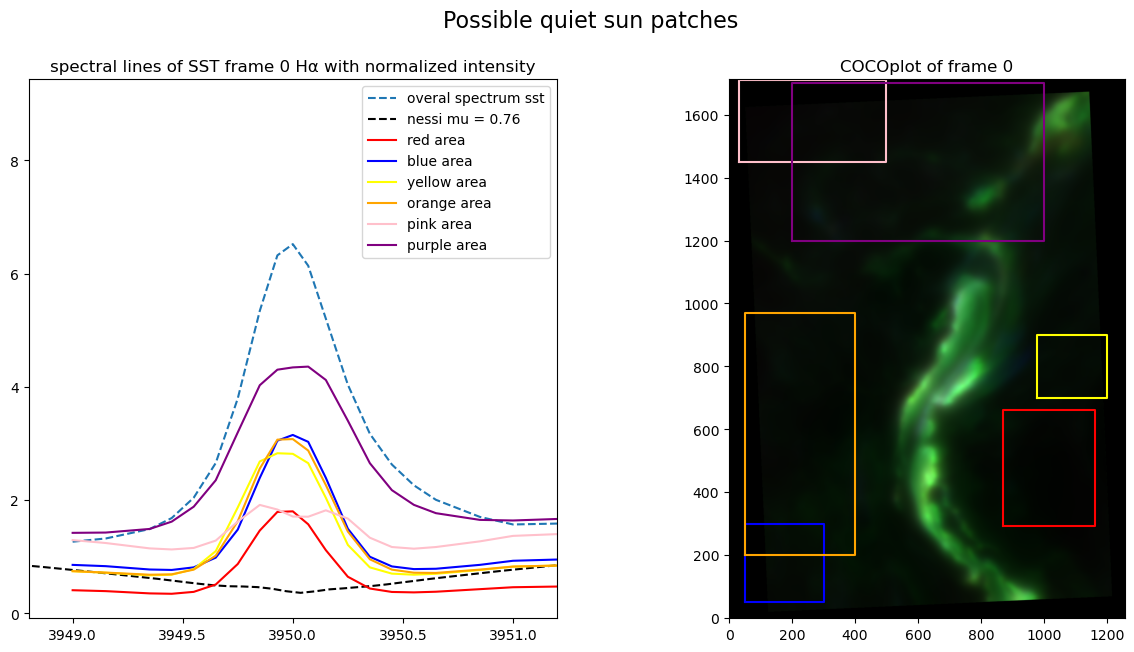
### The Yellow patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [56]:
color_wanted_patch = 'orange'

the edges of the patch are denoted by the xlim: (30, 500) and ylim: (1450, 1710)


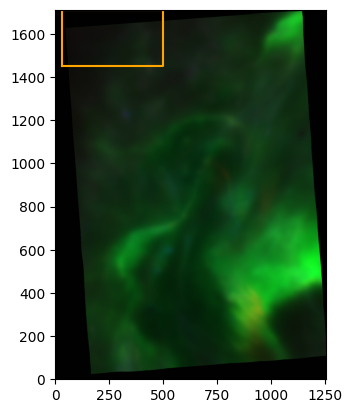

In [57]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

sst_data.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)


Now lets assume just that the height are equal. then we find the following:

In [58]:
# theta = [horizontal translation, vertical translation, vertical scale factor, horizontal scale factor]
X = sst_data.frame_integrated_spect(frame, xlim=xlim, ylim=ylim)/scaler
# theta = [np.median(sst_data._wavel)-np.median(theor_line.sst_wav), 0.55, 1]


theta = [np.median(sst_data._wavel)-np.median(theor_line.sst_wav), 0,  X[-1] /(theor_line.sst_dc*theor_line.best_fit_clv)[-1]]
sst_data.theta_nessi_to_quiet_sun = theta
print(theta)
print( (theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1]), X)


[-0.02712004214117769, 0, 1.5477402490294057]
[1.44020704 1.26624465 1.1099649  0.94310674 0.89641299 0.84825458
 0.80325443 0.76445536 0.74030818 0.73325742 0.71602857 0.67382511
 0.60499615 0.56065824 0.60118782 0.65518237 0.68252251 0.71539147
 0.74801954 0.79006367 0.83982205 0.88785547 0.93763468 0.98367622
 1.1588529  1.31747446 1.45210106 9.06710629] [1.24352606 1.20052387 1.11568163 1.10585663 1.15135199 1.33181501
 1.72273625 2.10882908 2.04719926 1.93148414 1.88677897 1.84014645
 1.60586298 1.3302296  1.16089004 1.08110766 1.06277251 1.16510082
 1.29463256 9.06710629]


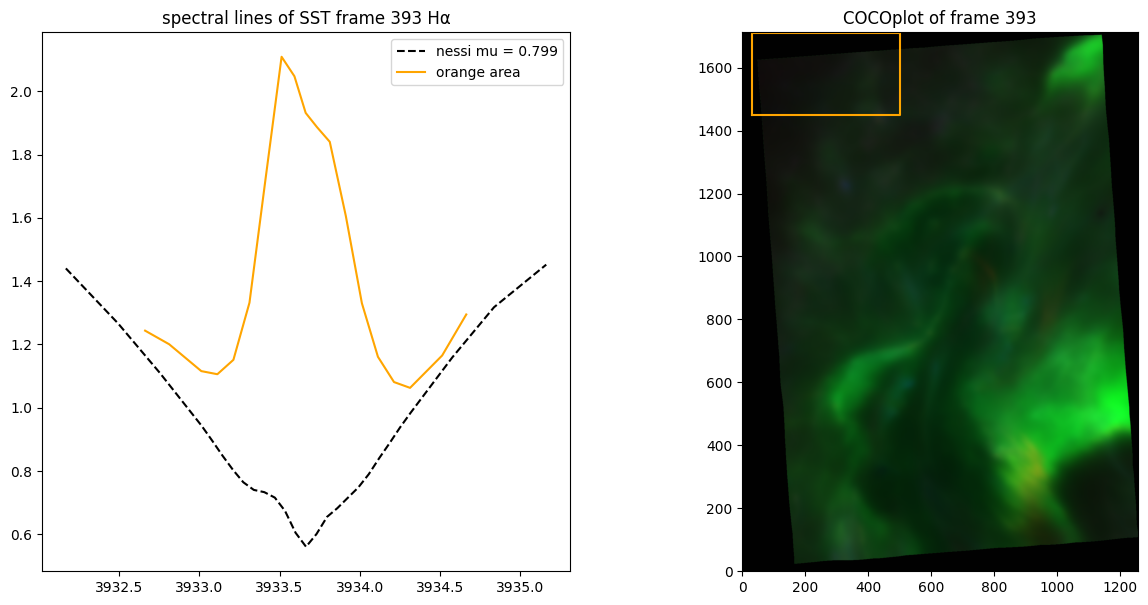

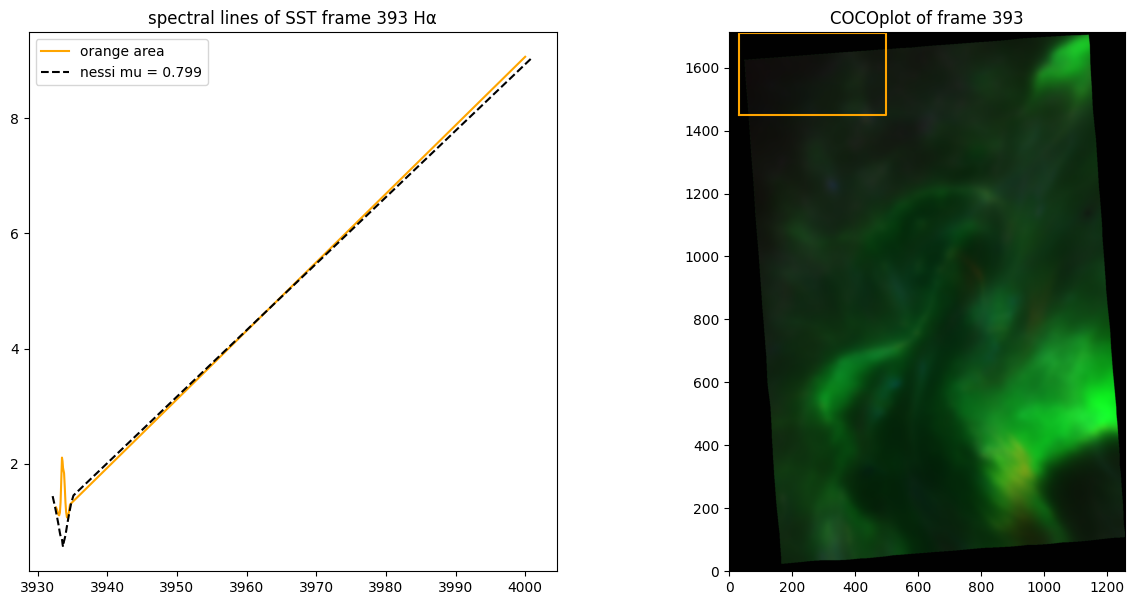

In [59]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))

sst_data.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
sst_data.frame_integrated_spect(frame)
# print(sst_data.av_spect/scaler)
# ax[0].plot(sst_data._wavel, sst_data.av_spect/scaler, label='sst data')


# theta = [np.median(sst_data._wavel)-np.median(theor_line.sst_wav), 0.55, 1]

ax[0].plot(theor_line.sst_wav[:-1] + theta[0], (theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1])[:-1],
            '--', label=f'nessi mu = {round(sst_data.mu, 3)}', color='black')

xlim, ylim = sst_data.quiet_sun['xlim'], sst_data.quiet_sun['ylim']

color = color_wanted_patch

ax[0].plot(sst_data._wavel[:-1], X[:-1], color=color, label=str(color)+' area') #
ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)

ax[0].legend()
# ax[0].set_xlim(sst_data.line_lim)

ax[1].imshow(Image.fromarray(sst_data.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()








fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))

sst_data.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
sst_data.frame_integrated_spect(frame)
# print(sst_data.av_spect/scaler)
# ax[0].plot(sst_data._wavel, sst_data.av_spect/scaler, label='sst data')


xlim, ylim = sst_data.quiet_sun['xlim'], sst_data.quiet_sun['ylim']

color = color_wanted_patch

ax[0].plot(sst_data._wavel, X, color=color, label=str(color)+' area') #
ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)

ax[0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1],
            '--', label=f'nessi mu = {round(sst_data.mu, 3)}', color='black')


ax[0].legend()
# ax[0].set_xlim(sst_data.line_lim)

ax[1].imshow(Image.fromarray(sst_data.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

In [60]:

# # alpha = [ verticale translatie, verticale schaalfactor]
# print('gess of theta used before:', theta)
# print(np.shape( sst_data._wavel[:-1]), np.shape( theor_line.sst_wav[:-1]), np.shape( theor_line.sst_dc[:-1]))

f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")

# import data_analysis as da

# g = len(sst_data._wavel)-1

# # dY = np.where(theor_line.sst_wav<6563.8, 0.01, 10) + np.where(6561.8<theor_line.sst_wav, 0.01, 10)

# #To simulate a specific domain around the well we cam make the errors on the wings huge
# avs = sst_data.quiet_spect
# data = [sst_data._wavel[:-1],  avs[:-1] /scaler,np.zeros(g)+0.01,np.zeros(g)+0.01]

# alpha0 = [0.55,1]
# mini = da.optimalisatie(data, model=f_nessi_clv, beginwaarden=alpha0, fout_model=None, plot=False)
#                                                                 #[-0.215, -0.111, 1.26][ 2.196e-01 , 6.288e-02 , 8.458e-01]
# theta = mini['x']
# sst_data.theta_nessi_to_quiet_sun = theta
# da.plot_fit(data, model=f_nessi_clv, theta0=mini['x'], titel="Data met fit ",labelx=" $x[]$",
#              labely=" $y$  []", figname=None , error=False)
# da.kwaliteit_fit(data, mini)
# mini

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

In [61]:
sst_data.define_cont_point(-1)
sst_data.cont_point=None

In [62]:
np.shape(sst_data.datacube)

(394, 1, 20, 1713, 1258)

(20,) (20,)


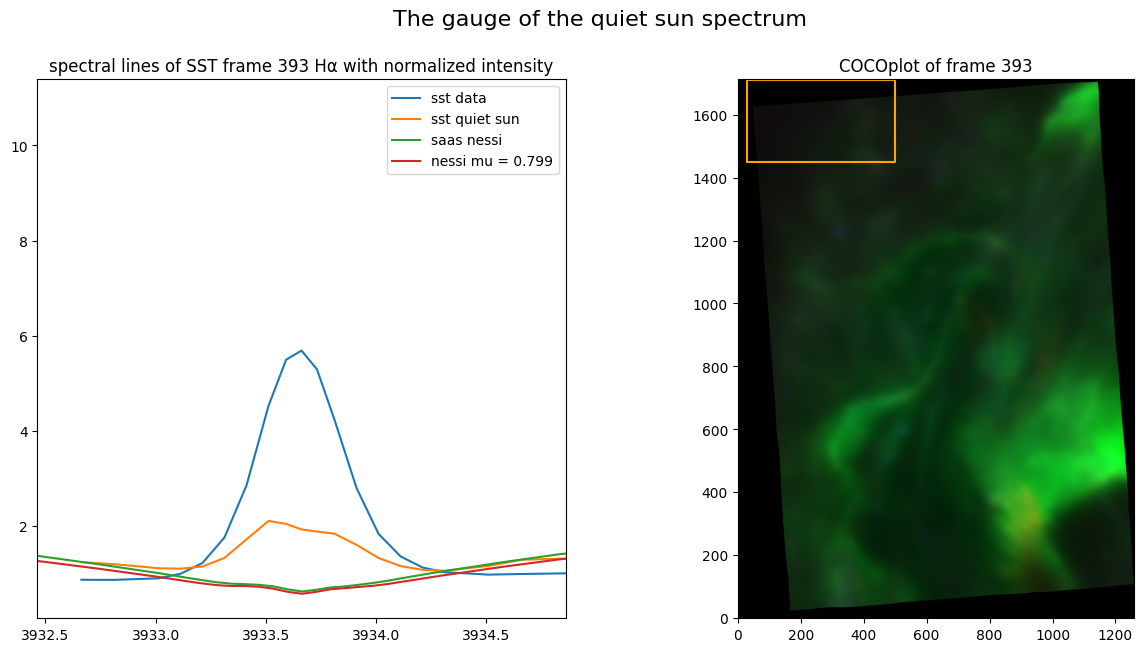

In [63]:

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('The gauge of the quiet sun spectrum', fontsize=16)

sst_data.ccp_frame(frame,Show=False)



ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
sst_data.frame_integrated_spect(frame)
print(np.shape(sst_data._wavel), np.shape(sst_data.quiet_spect/scaler))

ax[0].plot(sst_data._wavel, sst_data.av_spect/scaler, label='sst data')
ax[0].plot(sst_data._wavel, sst_data.quiet_spect/scaler, label='sst quiet sun') #

ax[0].plot(theor_line.sst_wav + theta[0], f_nessi(theta)(theor_line.sst_wav + theta[0]), label='saas nessi')
ax[0].plot(theor_line.sst_wav + theta[0], f_nessi_clv(theta)(theor_line.sst_wav + theta[0]), label=f'nessi mu = {round(sst_data.mu, 3)}')
ax[0].legend()
ax[1].imshow(sst_data.current_ccp, origin='lower')
ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color_wanted_patch)
ax[1].set_title("COCOplot of frame "+str(frame))
ax[0].set_xlim(sst_data.line_lim)

plt.show()

## How big should the flare be (assumption: linear scaling) to make a x% increase in the normal spectom in the line?

[3932.663      3932.75484001 3932.813      3933.013      3933.01476001
 3933.08012001 3933.113      3933.14548001 3933.21084001 3933.213
 3933.27468001 3933.313      3933.34004    3933.4054     3933.413
 3933.47076    3933.513      3933.5346     3933.593      3933.59996
 3933.663      3933.66532    3933.73068    3933.733      3933.79604
 3933.813      3933.85988    3933.913      3933.92524    3933.9906
 3934.013      3934.05596    3934.113      3934.11979999 3934.18515999
 3934.213      3934.25051999 3934.313      3934.31587999 3934.513
 3934.57579999 3934.663      3934.83571999 3935.16099998 4000.        ] [3932.663 3932.813 3933.013 3933.113 3933.213 3933.313 3933.413 3933.513
 3933.593 3933.663 3933.733 3933.813 3933.913 3934.013 3934.113 3934.213
 3934.313 3934.513 3934.663 4000.   ] [3932.16964002 3932.49492002 3932.75484001 3933.01476001 3933.08012001
 3933.14548001 3933.21084001 3933.27468001 3933.34004    3933.4054
 3933.47076    3933.5346     3933.59996    3933.66532    3933.7

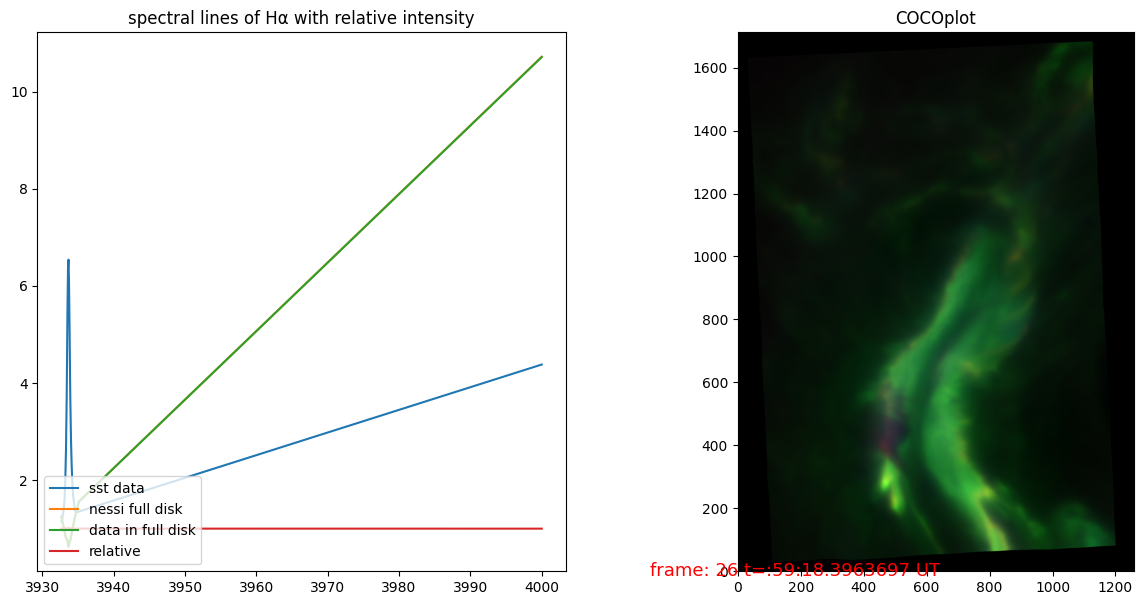

In [64]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
frame = 26

# line_sst, = ax[0].plot([], [], label='sst data')
# line_nessi, = ax[0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1], label=f'nessi mu = {round(sst_data.mu, 3)}')
# line_quiet_sun, = ax[0].plot(sst_data._wavel, sst_data.quiet_spect/scaler, label='quiet sun spectr')
sst_data.frame_integrated_spect(frame)
sst_data.ccp_frame(frame,Show=False)


theor_line = theor_line
sst_data = CaK
wav = un.merge_wavelengths(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])
print(wav, sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])


f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(sst_data._wavel, sst_data.av_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")



# line_sst, = ax[0, 0].plot(sst_data._wavel, sst_data.av_spect/sst_data.scalar, '--', label='sst data')
# ax[0, 0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1], label=f'nessi mu = {round(sst_data.mu, 3)}')
# ax[0, 0].plot(wav, f_nessi(theta)(wav), label='nessi full disk')



a=sst_data.current_ccp
im = ax[1].imshow(Image.fromarray(a), origin='lower', interpolation='none', aspect='auto', vmin=0, vmax=1)

# sst_data.ccp_frame(frame,Show=False)
_tstr=(f"Ca t={sst_data._time[frame][0:-7]} UT")

_tstr=_tstr[2:5]+_tstr[7:15]+_tstr[16:]
scaler = 2.7306518951052202e-08
ax[1].text(-280,-15,"frame: "+str(frame)+_tstr, fontsize=13, color='red')

ax[0].set_title("spectral lines of H\u03B1 with relative intensity")

ax[0].plot(wav, f_sst(wav), label='sst data')
# ax[0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1], label=f'nessi mu = {round(sst_data.mu, 3)}')
ax[0].plot(wav, f_nessi(theta)(wav), label='nessi full disk')

areafactor = 60**2 / (np.pi*950**2)

# f_sst_full = lambda theta : f_nessi(theta) + areafactor * (f_sst - f_nessi_clv(theta))
# f_relative = lambda theta : f_sst_full(theta) / f_nessi(theta)
sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))
relative = sst_full / f_nessi(theta)(wav)
print(relative, sst_full, f_nessi(theta)(wav) , areafactor ,f_sst(wav) , - f_nessi_clv(theta)(wav))
print("if integrated in the full disk spectrum the maximal deviation is ",  (np.max(relative)-1)*100, '%.')
# print(f_nessi(theta)(wav), f_sst(wav) - f_nessi_clv(theta)(wav))

# The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.
areafactor_001 = np.max((f_sst(wav) - f_nessi_clv(theta)(wav))/f_nessi(theta)(wav))**-1 * 0.01
# The area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.
areafactor_010 = areafactor_001 * 10

ax[0].plot(wav, sst_full , label='data in full disk')
ax[0].plot(wav, ((f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))) / f_nessi(theta)(wav)-1)*1+1, label='relative')

ax[0].legend(loc='lower left')
# ax[0].set_xlim([6561, 6565])
# ax[0].set_ylim([0.2, 1.5])
ax[1].imshow(Image.fromarray(sst_data.current_ccp), origin='lower')
ax[1].set_title("COCOplot")
plt.show()

In [65]:
print("The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.\n",
      areafactor_001, "\t\t this is an increase of ", areafactor_001/areafactor *100, "%",
      "\nThe area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.\n",
      areafactor_010, "\t\t this is an increase of ", areafactor_010/areafactor *100, "%",
      "\nThe real area ratio flare/full disk that the flare has\n", areafactor)

The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.
 0.0010499285519360924 		 this is an increase of  82.6902545156897 % 
The area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.
 0.010499285519360925 		 this is an increase of  826.902545156897 % 
The real area ratio flare/full disk that the flare has
 0.001269712565386866


Assume now that the standard deviation is 0.2% of the spectrum than for the current flare to be detected as an increase in the H alpha line? 

## The full FOV integrated spectrum over time:

In [66]:
sst_data = CaK
np.shape(sst_data.datacube)

(394, 1, 20, 1713, 1258)

In [67]:
sst_data.calculate__FOV_spect_over_time()

# Best possible interval

![image.png](attachment:image.png)
<!-- ![IMG_20231123_130152(2).jpg](attachment:IMG_20231123_130152(2).jpg) -->

The goal is to find the best signal to noise ratio of detecting a flare by giving an optimal interval. Here we look at 
$$\frac{1}{\sigma}\frac{\Delta I}{I} $$
where $\sigma$ is the standard deviation of the spectrum in the interval PER UNIT AREA!(with following two options):

- Looking for an area $A$ under the interval with with $\Delta x$ for each pixel en then taking $\sum \frac{1}{n-1} (A - \bar{A})^2$
- looking at the standard deviation of the all of the wavelength values then averaging over those used in the interval. 

Remark: this has to be done per unit area or per pixel. 

Here we will display the standard devation for the two regimes for the Halpha line

d:\solar flares\data\2017-09-06\use_nessi.py:1432: RuntimeWarning: divide by zero encountered in scalar divide
  intervals = np.array([peak-Deltas/2, peak+Deltas/2])


d:\solar flares\data\2017-09-06\use_nessi.py:1423: RuntimeWarning: invalid value encountered in scalar divide
  return std


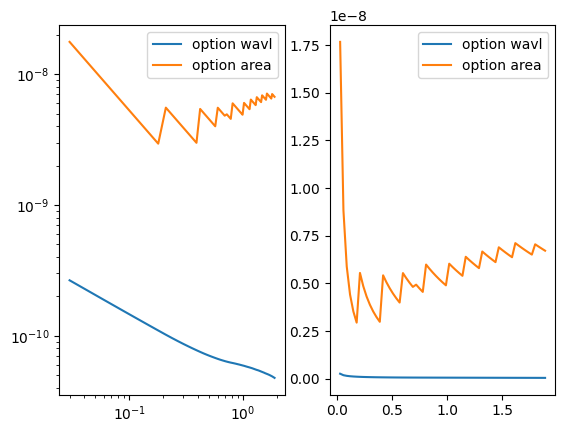

STD_Area = array([3.53194548e-08, 1.76597274e-08, 8.82986369e-09, 5.88657579e-09,
       4.41493185e-09, 3.53194548e-09, 2.94328790e-09, 5.54817409e-09,
       4.85465233e-09, 4.31524651e-09, 3.88372186e-09, 3.53065624e-09,
       3.23643489e-09, 2.98747836e-09, 5.42332369e-09, 5.06176878e-09,
       4.74540823e-09, 4.46626657e-09, 4.21814065e-09, 3.99613325e-09,
       5.53987226e-09, 5.27606882e-09, 5.03624751e-09, 4.81728023e-09,
       4.93361370e-09, 4.73626915e-09, 4.55410496e-09, 5.98710601e-09,
       5.77328080e-09, 5.57420215e-09, 5.38839541e-09, 5.21457620e-09,
       5.05162070e-09, 4.89854128e-09, 6.03237199e-09, 5.86001850e-09,
       5.69724021e-09, 5.54326075e-09, 5.39738546e-09, 6.39503948e-09,
       6.23516350e-09, 6.08308634e-09, 5.93825095e-09, 5.80015209e-09,
       6.67023810e-09, 6.52201059e-09, 6.38022775e-09, 6.24447822e-09,
       6.11438492e-09, 6.89223433e-09, 6.75438964e-09, 6.62195063e-09,
       6.49460542e-09, 6.37206570e-09, 7.11120874e-09, 6.98191404e

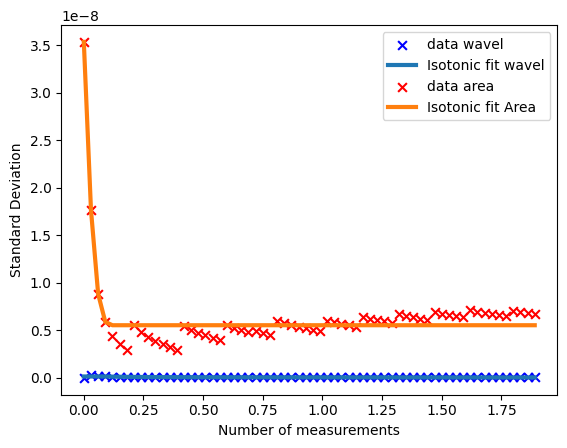

d:\solar flares\data\2017-09-06\use_nessi.py:1497: RuntimeWarning: invalid value encountered in scalar divide
  


The maximal signal to noise ratio for the area criterion is if the interval is of width $\Delta x=1.6199999999999999\AA$.
at an intesity of 93856.03364882646. For a standard deviation of 5.538740228707992e-09.

The maximal signal to noise ratio for the wavl criterion is if the interval is of width $\Delta x=1.89\AA$.
at an intesity of 10515768.833399765. For a standard deviation of 4.7658267071164734e-11.



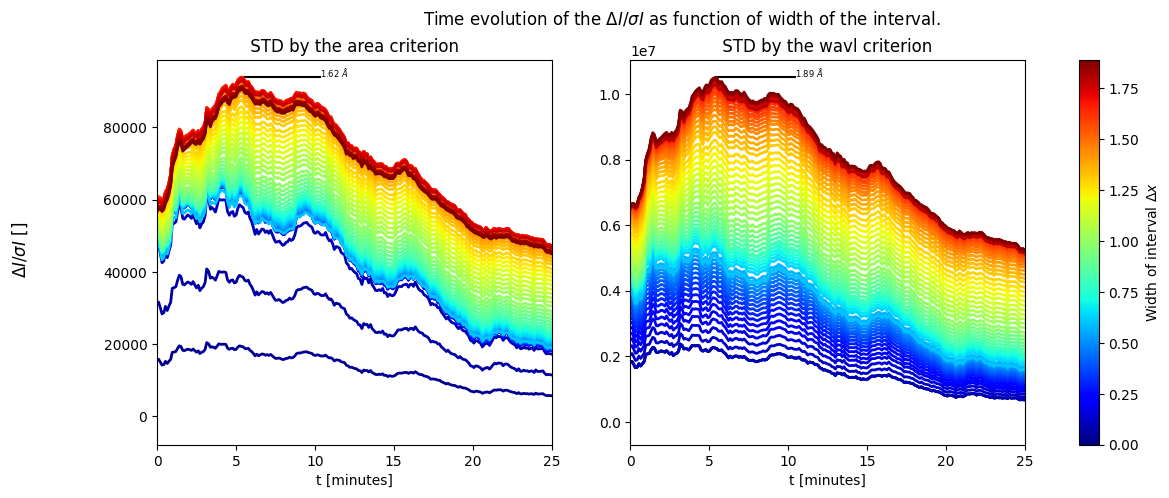

d:\solar flares\data\2017-09-06\use_nessi.py:1641: RuntimeWarning: All-NaN slice encountered
  


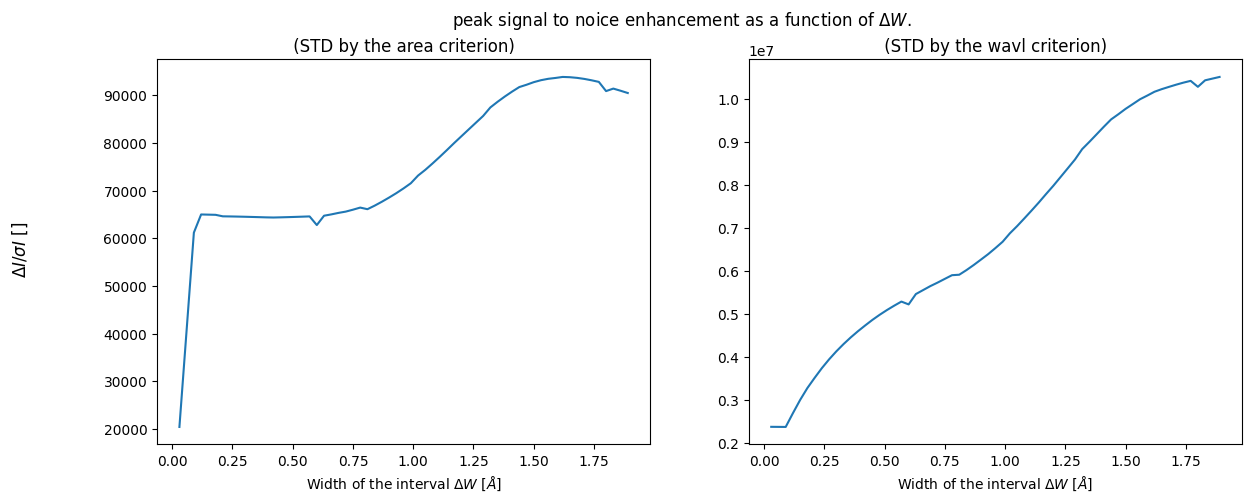

Directory 'line_data/optimal_width' already exists.


(array([[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [15615.34114363, 15833.3295261 , 14988.10658802, ...,
          -416.54548014,  -444.92980282,  -513.79534568],
        [31209.00772324, 31634.68232355, 29959.14326052, ...,
          -825.69323454,  -883.68866286, -1022.81898056],
        ...,
        [57334.91619556, 58131.72541374, 58108.30382422, ...,
         25667.47932564, 25619.32038856, 25511.72266097],
        [56934.60955144, 57743.01159428, 57731.79904627, ...,
         25403.53846938, 25359.10034005, 25250.43165826],
        [56520.63550848, 57341.23841591, 57340.45874215, ...,
         25113.48559793, 25072.0700809 , 24962.67005304]]),
 array([[             nan,              nan,              nan, ...,
                      nan,              nan,              nan],
        [1814574.58384895, 1839905.83820764, 1741687.0386937 , ...,
          -48404.50389992,  -51702.89296725,  -59705.38632409],
 

In [68]:
reload(un)
un.analyse_optimal_interval(sst_data=CaK, Deltas=np.arange(0,1.9, 0.03))

# Figure 4 In HARPS ALEX
![image.png](attachment:image.png)

Now we do it for the FOV spectum with as normalisation the quiet sun

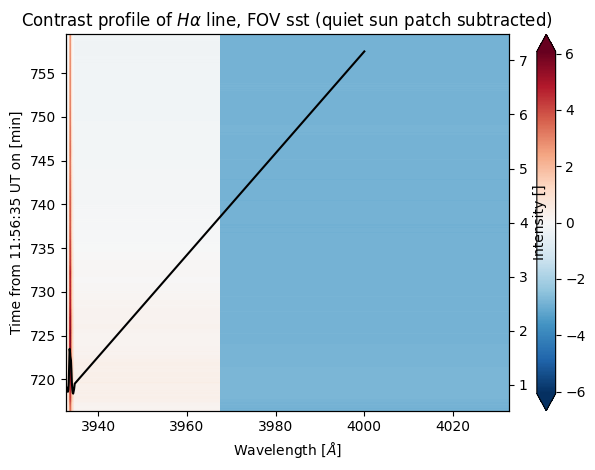

In [69]:
FOV_spectrum = sst_data.FOV_spectrum

QS = sst_data.quiet_spect/sst_data.scalar
Z = FOV_spectrum - QS
x = sst_data._wavel
y = TIME
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (quiet sun patch subtracted)')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

For FOV with Nessi normalisation (of course fit to the quiet sun patch)

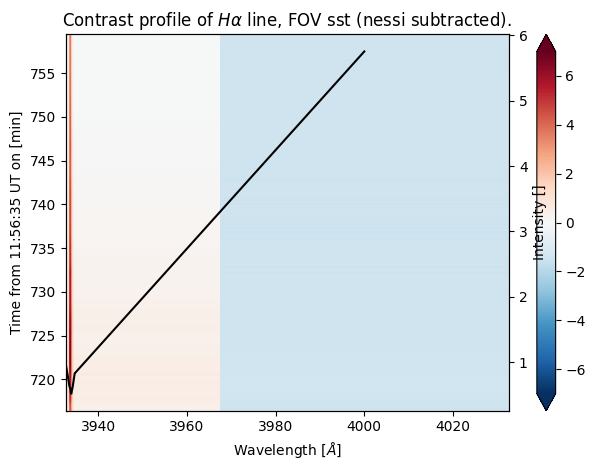

In [70]:
theta = [ 1.750e-01,  1.487e-01,  9.732e-01]
theor_line = theor_line

f_nessi_clv = interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1]
                                  , kind='linear', fill_value="extrapolate")
QS = f_nessi_clv(sst_data._wavel)

Z = FOV_spectrum - QS
x = sst_data._wavel
y = TIME
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (nessi subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

The longer stripes here on the contrast plot come from the differences between nessi en quiet sun which was not an as good fit as hoped

### For the full disk profile

(394, 20) [1.         1.04477534 1.17656189 1.32999925 1.61413861 2.0980526
 2.99883801 4.22100658 4.99589738 5.15287405 4.85124775 4.11339115
 3.19107113 2.50586066 2.07684945 1.78715383 1.58475936 1.34570399
 1.24054155 4.28739236] [3932.663 3932.813 3933.013 3933.113 3933.213 3933.313 3933.413 3933.513
 3933.593 3933.663 3933.733 3933.813 3933.913 3934.013 3934.113 3934.213
 3934.313 3934.513 3934.663 4000.   ]


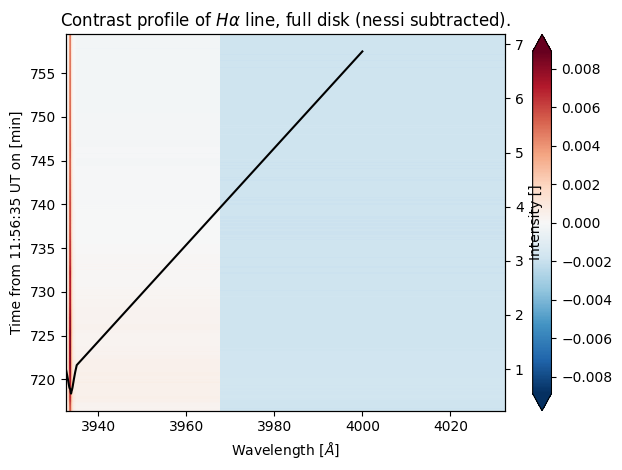

In [71]:


wav = un.merge_wavelengths(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])

f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(sst_data._wavel, sst_data.av_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")

print(np.shape(FOV_spectrum), FOV_spectrum[0], sst_data._wavel)
# print([(interp1d(sst_data._wavel, FOV_spectrum[0], kind='linear', fill_value="extrapolate")(wav)) for i in range(np.shape(FOV_spectrum)[0])])
# print(f_sst(wav))

areafactor = 60**2 / (np.pi*950**2)


# relative = sst_full / f_nessi(theta)(wav)


QS_clv = f_nessi_clv(theta)(wav)

sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))

Z_full_disk = np.array([areafactor*(interp1d(sst_data._wavel, FOV_spectrum[i], kind='linear', fill_value="extrapolate")(wav) - QS_clv)
                        for i in range(np.shape(FOV_spectrum)[0])])
x = wav
y = TIME
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z_full_disk, cmap='RdBu_r', vmin=-np.max(Z_full_disk), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, full disk (nessi subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,f_nessi(theta)(wav), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

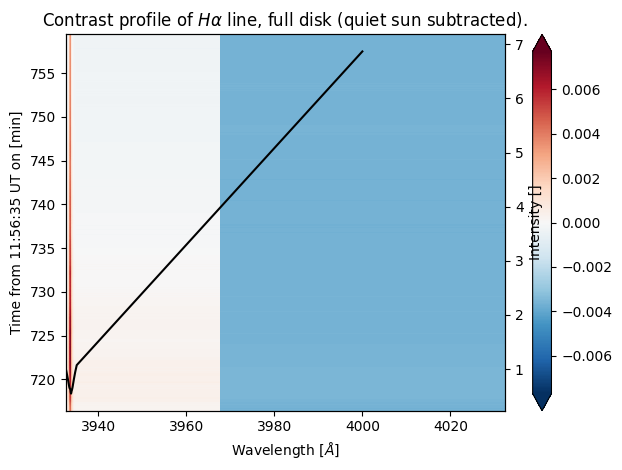

In [72]:


wav = un.merge_wavelengths(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])

f_sun_patch_clv = interp1d(sst_data._wavel, sst_data.quiet_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(sst_data._wavel, sst_data.av_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")

QS_from_qs_patch = f_sun_patch_clv(wav)

sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - QS_from_qs_patch)

Z_full_disk = np.array([areafactor*(interp1d(sst_data._wavel, FOV_spectrum[i], kind='linear', fill_value="extrapolate")(wav) - QS_from_qs_patch)
                        for i in range(np.shape(FOV_spectrum)[0])])
x = wav
y = TIME
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z_full_disk, cmap='RdBu_r', vmin=-np.max(Z_full_disk), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, full disk (quiet sun subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,f_nessi(theta)(wav), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# Equivalent width

The frame integrated spectrum:
$$f(t,\lambda,A) = \int_A I(t,\lambda,\vec{x})d\vec{x}$$

weight against a continuum wavelength
$$F(t,\lambda,A) = \frac{f(t,\lambda,A)}{f(t,\lambda_\text{cont},A)} \times f(t_0,\lambda_\text{cont},A)$$

Target Region wieghted against a quiet region to find relative intensity
$$F_{TR}(t, \lambda) = \frac{F(t,\lambda,A = TR)}{F(t,\lambda,A = QR)} \times F(t_0,\lambda,A=QR)$$
This we do both with the scalar multiplication to find relative intensities

The difference in spectrum in time (we do spectrum - quiet sun)
$$\Delta F=  F_{TR}(t,\lambda) - F_{TR}(t_0,\lambda)$$

weighing it again against a reference intensity. (We incorporate this is the scalar weight)
$$\Delta S(t,\lambda) = \Delta F_{TR}(t,\lambda)/F(t_0,\lambda_\text{cont},A=\text{ full disk})$$

The equivalent width is defind as the integral over the resulting normalized pre-event-subtracted H$\alpha$ spectrum
$\Delta S(t, \lambda)$ represents the ratio of the spectral changes coming from
active events to the solar irradiance (full-disk continuum). 
$$ \Delta EW_{H\alpha \pm \Delta \lambda } = \int_{H\alpha - \Delta \lambda}^{H\alpha + \Delta \lambda} \Delta S(t,\lambda ) d\lambda $$ 


To obtain something analogous (or even maybe equivalent although only a function of the line center.) We could integrate over the difference of NESSI+sst - NESSI.








In [73]:
import scipy

def differenced_equivalent_width(sst_data, f_nessi_theta, f_nessi_clv_theta, wav, Dlambda):

    line_center = wav[np.where(f_nessi_theta(wav) == np.min(f_nessi_theta(wav)))[0][0]]
    interval = [line_center-Dlambda, line_center+Dlambda]

    DEW = []

    for frame in range(sst_data._number_of_frames):
        DS = areafactor * (interp1d(sst_data._wavel, sst_data.FOV_spectrum[frame])(wav) - f_nessi_clv_theta(wav))

        x, restx = un.restrict_intervalx2(interval, wav)

        DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))

    return DEW


The equivalent width calculated in its difference to nessi 

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_13648\2074632677.py:15: DeprecationWarning: The 'even' keyword is deprecated as of SciPy 1.11.0 and will be removed in SciPy 1.13.0
  DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))


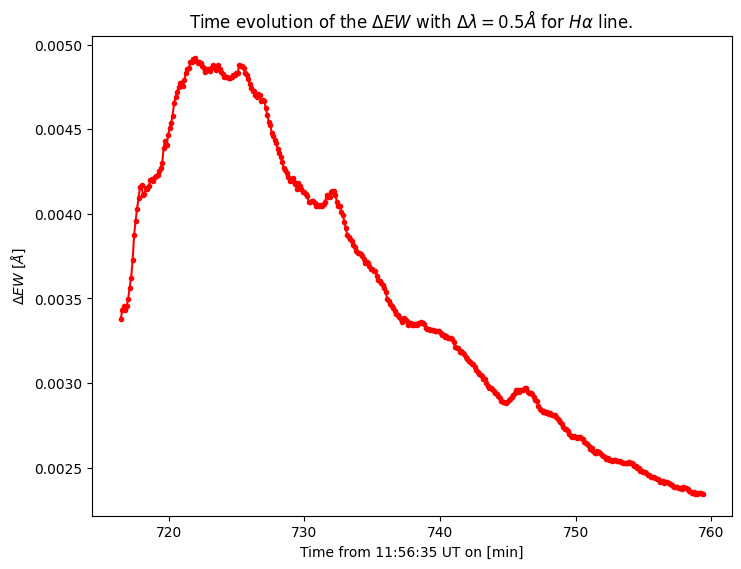

In [74]:
DEW = differenced_equivalent_width(sst_data = sst_data, f_nessi_theta = f_nessi(theta), f_nessi_clv_theta=f_nessi_clv(theta), wav=wav, Dlambda= 0.5)

fig = plt.figure()
ax1 = fig.add_axes((0,0,1,1))
ax1.plot(TIME, DEW, '-o', color='r', label=r'$\Delta EW$', markersize=3)
ax1.set_title(r'Time evolution of the $\Delta EW $ with $\Delta \lambda = 0.5 \AA$ for $H\alpha$ line. ')
ax1.set_xlabel('Time from 11:56:35 UT on [min]')
ax1.set_ylabel(r'$\Delta EW$ $[\AA]$')
# ax1.legend()
plt.show()

The equivalent width calculated in its difference to the quiet sun patch

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_13648\2074632677.py:15: DeprecationWarning: The 'even' keyword is deprecated as of SciPy 1.11.0 and will be removed in SciPy 1.13.0
  DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))


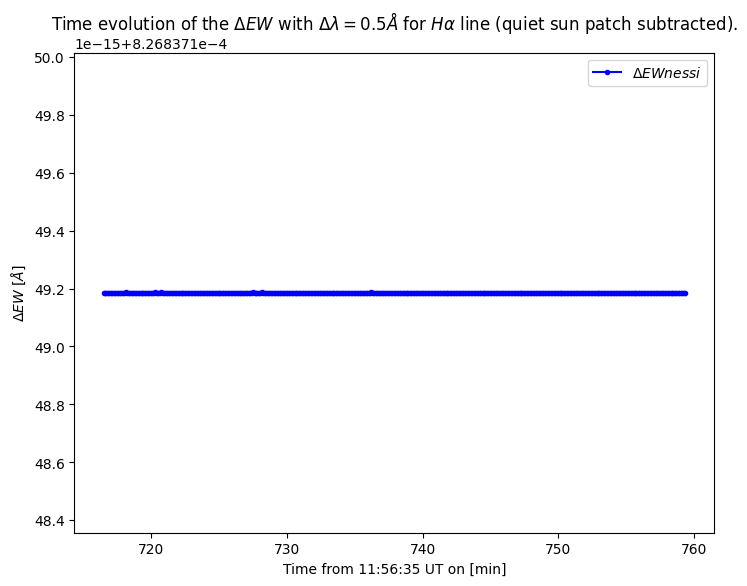

In [75]:
DEW2 = differenced_equivalent_width(sst_data = sst_data, f_nessi_theta = f_nessi(theta), f_nessi_clv_theta=f_sun_patch_clv, wav=wav, Dlambda= 0.5)
# DEW = differenced_equivalent_width(sst_data = sst_data, f_nessi_theta = f_nessi(theta), f_nessi_clv_theta=f_nessi_clv(theta), wav=wav, Dlambda= 0.5)

fig = plt.figure()
ax1 = fig.add_axes((0,0,1,1))
# ax1.plot(TIME, DEW2 - np.min(DEW2)+0.00001, '-o', color='r', label=r'$\Delta EW$ QSP', markersize=3)
# ax1.plot(TIME, DEW - np.min(DEW), '-o', color='b', label=r'$\Delta EW nessi$', markersize=3)
ax1.plot(TIME, np.array(DEW) - np.array(DEW2), '-o', color='b', label=r'$\Delta EW nessi$', markersize=3)
ax1.set_title(r'Time evolution of the $\Delta EW $ with $\Delta \lambda = 0.5 \AA$ for $H\alpha$ line (quiet sun patch subtracted).')
ax1.set_xlabel('Time from 11:56:35 UT on [min]')
ax1.set_ylabel(r'$\Delta EW$ $[\AA]$')
# ax1.legend
ax1.legend()
plt.show()

## maybe centroid analysis between nessi + sst and harps ?

# The different footprints of flare things in its spectrum

- Ribbon area to some of the line increases.
- adding spectrum of differnt places to the movies
- flare area
- ...

# What if the flare was 10 times bigger?
To do:

adding adding gaussian noise to the flare and multiply

time averaging or taking the x'th flare: 5min of harps 

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

In [78]:
un.save_for_further_analysis(sst_data, theor_line)
